<a href="https://colab.research.google.com/github/ssenichhh/Neural-Networks/blob/main/Gradient%20Descent%20with%20Digits%20Dataset/Gradient_Descent_with_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download the dataset according and apply the developed neural network to it.

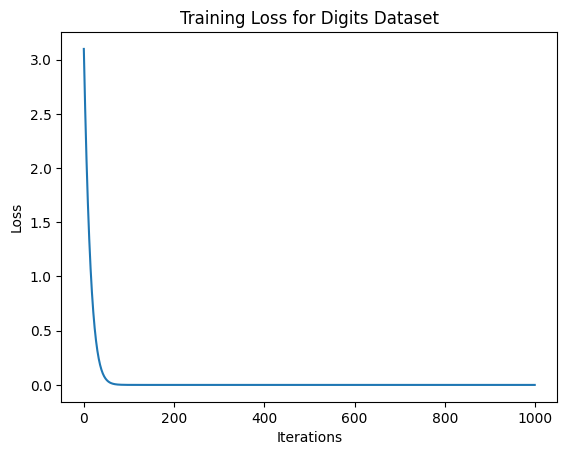

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Load the Digits dataset
digits = datasets.load_digits()
X_digits = digits.data
Y_digits = digits.target.reshape(-1, 1)

# Standardize the dataset
scaler_digits = StandardScaler().fit(X_digits)
X_digits = scaler_digits.transform(X_digits)

# Split the dataset into training and testing sets
X_digits_train, X_digits_test, Y_digits_train, Y_digits_test = train_test_split(X_digits, Y_digits, test_size=0.2, random_state=42)

def initialize_weights(n_input, n_hidden, n_output):
    """
    Initialize weights and biases for the neural network.

    Parameters:
    n_input (int): Number of input features.
    n_hidden (int): Number of hidden neurons.
    n_output (int): Number of output neurons.

    Returns:
    tuple: Initialized weights and biases.
    """
    W1 = np.random.randn(n_input, n_hidden) * 0.01
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output) * 0.01
    b2 = np.zeros((1, n_output))
    return W1, b1, W2, b2

def sigmoid(x):
    """
    Compute the sigmoid activation function.

    Parameters:
    x (ndarray): Input array.

    Returns:
    ndarray: Sigmoid of input.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Compute the derivative of the sigmoid function.

    Parameters:
    x (ndarray): Input array.

    Returns:
    ndarray: Derivative of sigmoid of input.
    """
    return x * (1 - x)

def forward_pass_multiclass(X, W1, b1, W2, b2):
    """
    Perform a forward pass through the neural network.

    Parameters:
    X (ndarray): Input data.
    W1 (ndarray): Weights for the first layer.
    b1 (ndarray): Biases for the first layer.
    W2 (ndarray): Weights for the second layer.
    b2 (ndarray): Biases for the second layer.

    Returns:
    tuple: Intermediate and final activations and weighted sums.
    """
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_pass_multiclass(X, Y, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate=0.01):
    """
    Perform a backward pass through the neural network and update weights and biases.

    Parameters:
    X (ndarray): Input data.
    Y (ndarray): True labels.
    Z1 (ndarray): Weighted sum of inputs for the first layer.
    A1 (ndarray): Activation of the first layer.
    Z2 (ndarray): Weighted sum of inputs for the second layer.
    A2 (ndarray): Activation of the second layer.
    W1 (ndarray): Weights for the first layer.
    W2 (ndarray): Weights for the second layer.
    b1 (ndarray): Biases for the first layer.
    b2 (ndarray): Biases for the second layer.
    learning_rate (float): Learning rate for gradient descent.

    Returns:
    tuple: Updated weights and biases.
    """
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = 1 / m * np.dot(A1.T, dZ2)
    db2 = 1 / m * np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = 1 / m * np.dot(X.T, dZ1)
    db1 = 1 / m * np.sum(dZ1, axis=0, keepdims=True)
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    return W1, b1, W2, b2

def compute_multiclass_loss(Y, Y_hat):
    """
    Compute the loss for the neural network.

    Parameters:
    Y (ndarray): True labels.
    Y_hat (ndarray): Predicted labels.

    Returns:
    float: Computed loss.
    """
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[0]
    L = -(1 / m) * L_sum
    return L

def train_model(X, Y, W1, b1, W2, b2, num_iterations=1000, learning_rate=0.01):
    """
    Train the neural network using gradient descent.

    Parameters:
    X (ndarray): Input data.
    Y (ndarray): True labels.
    W1 (ndarray): Weights for the first layer.
    b1 (ndarray): Biases for the first layer.
    W2 (ndarray): Weights for the second layer.
    b2 (ndarray): Biases for the second layer.
    num_iterations (int): Number of training iterations.
    learning_rate (float): Learning rate for gradient descent.

    Returns:
    tuple: Updated weights, biases, and loss values.
    """
    loss_values = []
    for i in range(num_iterations):
        Z1, A1, Z2, A2 = forward_pass_multiclass(X, W1, b1, W2, b2)
        W1, b1, W2, b2 = backward_pass_multiclass(X, Y, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate)
        loss = compute_multiclass_loss(Y, A2)
        loss_values.append(loss)
    return W1, b1, W2, b2, loss_values

# Initialize weights
W1, b1, W2, b2 = initialize_weights(X_digits_train.shape[1], n_hidden=5, n_output=1)

# Train the model
W1, b1, W2, b2, loss_values = train_model(X_digits_train, Y_digits_train, W1, b1, W2, b2, num_iterations=1000)

# Plot the training loss
plt.plot(loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss for Digits Dataset')
plt.show()


# 2. Compare with ready-made solutions and analyze the results, calculating quality metrics. Use a pre-trained neural network model from the scikit-learn library and compare its performance with the custom-developed network, for example, using MLPClassifier.


In [4]:
def accuracy(y_true, y_pred):
    """
    Calculate accuracy.

    Parameters:
    y_true (ndarray): True labels.
    y_pred (ndarray): Predicted labels.

    Returns:
    float: Accuracy.
    """
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def precision(y_true, y_pred):
    """
    Calculate precision.

    Parameters:
    y_true (ndarray): True labels.
    y_pred (ndarray): Predicted labels.

    Returns:
    float: Precision.
    """
    true_positive = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    false_positive = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    return true_positive / (true_positive + false_positive)

def recall(y_true, y_pred):
    """
    Calculate recall.

    Parameters:
    y_true (ndarray): True labels.
    y_pred (ndarray): Predicted labels.

    Returns:
    float: Recall.
    """
    true_positive = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    false_negative = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    return true_positive / (true_positive + false_negative)

def f1_score(y_true, y_pred):
    """
    Calculate F1-score.

    Parameters:
    y_true (ndarray): True labels.
    y_pred (ndarray): Predicted labels.

    Returns:
    float: F1-score.
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r)

# Prediction on the test set
Z1_test = np.dot(X_digits_test, W1) + b1
A1_test = np.tanh(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = 1 / (1 + np.exp(-Z2_test))
predictions = (A2_test > 0.5).astype(int)

# Calculate metrics
acc = accuracy(Y_digits_test, predictions)
prec = precision(Y_digits_test, predictions)
rec = recall(Y_digits_test, predictions)
f1 = f1_score(Y_digits_test, predictions)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1, "\n")

# MLPClassifier from scikit-learn
n_hidden = 50
clf = MLPClassifier(hidden_layer_sizes=(n_hidden,), max_iter=400, alpha=0.01, solver='sgd', verbose=10, random_state=42, learning_rate_init=.01)
clf.fit(X_digits_train, Y_digits_train.ravel())
Y_digits_pred = clf.predict(X_digits_test)

# Calculate metrics for MLPClassifier
acc_sklearn = accuracy(Y_digits_test, Y_digits_pred)
prec_sklearn = precision(Y_digits_test, Y_digits_pred)
rec_sklearn = recall(Y_digits_test, Y_digits_pred)
f1_sklearn = f1_score(Y_digits_test, Y_digits_pred)

print("Scikit-learn MLPClassifier Metrics:")
print("Accuracy:", acc_sklearn)
print("Precision:", prec_sklearn)
print("Recall:", rec_sklearn)
print("F1-score:", f1_sklearn, "\n")


Accuracy: 0.1638888888888889
Precision: 0.9333333333333333
Recall: 1.0
F1-score: 0.9655172413793104 

Iteration 1, loss = 2.39993684
Iteration 2, loss = 1.77048888
Iteration 3, loss = 1.22167208
Iteration 4, loss = 0.87002831
Iteration 5, loss = 0.64694475
Iteration 6, loss = 0.51086604
Iteration 7, loss = 0.42388783
Iteration 8, loss = 0.36515891
Iteration 9, loss = 0.32317806
Iteration 10, loss = 0.29074814
Iteration 11, loss = 0.26614486
Iteration 12, loss = 0.24654180
Iteration 13, loss = 0.22985032
Iteration 14, loss = 0.21566167
Iteration 15, loss = 0.20337570
Iteration 16, loss = 0.19267063
Iteration 17, loss = 0.18321934
Iteration 18, loss = 0.17414912
Iteration 19, loss = 0.16668046
Iteration 20, loss = 0.15930813
Iteration 21, loss = 0.15306157
Iteration 22, loss = 0.14722532
Iteration 23, loss = 0.14131882
Iteration 24, loss = 0.13611280
Iteration 25, loss = 0.13137131
Iteration 26, loss = 0.12688294
Iteration 27, loss = 0.12266208
Iteration 28, loss = 0.11893138
Iteration 2

# 3. Optimize the neural network architecture.

<ipython-input-3-438c9ce5fb9a>:127: RuntimeWarning: invalid value encountered in log
  L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
<ipython-input-3-438c9ce5fb9a>:48: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


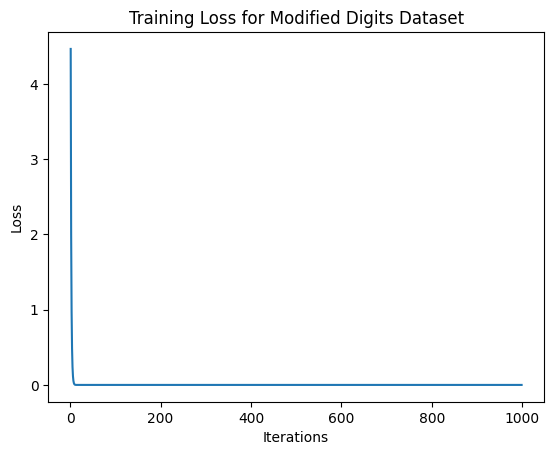

In [5]:
def initialize_weights_modified(n_input, n_hidden1, n_hidden2, n_output):
    """
    Initialize weights and biases for the modified neural network.

    Parameters:
    n_input (int): Number of input features.
    n_hidden1 (int): Number of neurons in the first hidden layer.
    n_hidden2 (int): Number of neurons in the second hidden layer.
    n_output (int): Number of output neurons.

    Returns:
    tuple: Initialized weights and biases.
    """
    W1 = np.random.randn(n_input, n_hidden1) * 0.01
    b1 = np.zeros((1, n_hidden1))
    W2 = np.random.randn(n_hidden1, n_hidden2) * 0.01
    b2 = np.zeros((1, n_hidden2))
    W3 = np.random.randn(n_hidden2, n_output) * 0.01
    b3 = np.zeros((1, n_output))
    return W1, b1, W2, b2, W3, b3

def forward_pass_multiclass(X, W1, b1, W2, b2, W3, b3):
    """
    Perform a forward pass through the modified neural network.

    Parameters:
    X (ndarray): Input data.
    W1 (ndarray): Weights for the first layer.
    b1 (ndarray): Biases for the first layer.
    W2 (ndarray): Weights for the second layer.
    b2 (ndarray): Biases for the second layer.
    W3 (ndarray): Weights for the third layer.
    b3 (ndarray): Biases for the third layer.

    Returns:
    tuple: Intermediate and final activations and weighted sums.
    """
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = np.tanh(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def backward_pass_multiclass(X, Y, Z1, A1, Z2, A2, Z3, A3, W1, W2, b1, b2, W3, b3, learning_rate=0.01):
    """
    Perform a backward pass through the modified neural network and update weights and biases.

    Parameters:
    X (ndarray): Input data.
    Y (ndarray): True labels.
    Z1 (ndarray): Weighted sum of inputs for the first layer.
    A1 (ndarray): Activation of the first layer.
    Z2 (ndarray): Weighted sum of inputs for the second layer.
    A2 (ndarray): Activation of the second layer.
    Z3 (ndarray): Weighted sum of inputs for the third layer.
    A3 (ndarray): Activation of the third layer.
    W1 (ndarray): Weights for the first layer.
    W2 (ndarray): Weights for the second layer.
    b1 (ndarray): Biases for the first layer.
    b2 (ndarray): Biases for the second layer.
    W3 (ndarray): Weights for the third layer.
    b3 (ndarray): Biases for the third layer.
    learning_rate (float): Learning rate for gradient descent.

    Returns:
    tuple: Updated weights and biases.
    """
    m = X.shape[0]
    dZ3 = A3 - Y
    dW3 = 1 / m * np.dot(A2.T, dZ3)
    db3 = 1 / m * np.sum(dZ3, axis=0, keepdims=True)
    dA2 = np.dot(dZ3, W3.T)

    dZ2 = dA2 * (Z2 > 0)
    dW2 = 1 / m * np.dot(A1.T, dZ2)
    db2 = 1 / m * np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)

    dZ1 = dA1 * (Z1 > 0)
    dW1 = 1 / m * np.dot(X.T, dZ1)
    db1 = 1 / m * np.sum(dZ1, axis=0, keepdims=True)

    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    return W1, b1, W2, b2, W3, b3

def train_model_modified(X, Y, W1, b1, W2, b2, W3, b3, num_iterations=1000, learning_rate=0.01):
    """
    Train the modified neural network using gradient descent.

    Parameters:
    X (ndarray): Input data.
    Y (ndarray): True labels.
    W1 (ndarray): Weights for the first layer.
    b1 (ndarray): Biases for the first layer.
    W2 (ndarray): Weights for the second layer.
    b2 (ndarray): Biases for the second layer.
    W3 (ndarray): Weights for the third layer.
    b3 (ndarray): Biases for the third layer.
    num_iterations (int): Number of training iterations.
    learning_rate (float): Learning rate for gradient descent.

    Returns:
    tuple: Updated weights, biases, and loss values.
    """
    loss_values = []
    for i in range(num_iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_pass_multiclass(X, W1, b1, W2, b2, W3, b3)
        W1, b1, W2, b2, W3, b3 = backward_pass_multiclass(X, Y, Z1, A1, Z2, A2, Z3, A3, W1, W2, b1, b2, W3, b3, learning_rate)
        loss = compute_multiclass_loss(Y, A3)
        loss_values.append(loss)
    return W1, b1, W2, b2, W3, b3, loss_values

n_hidden1 = 64
n_hidden2 = 32
W1, b1, W2, b2, W3, b3 = initialize_weights_modified(X_digits_train.shape[1], n_hidden1, n_hidden2, n_output=1)
W1, b1, W2, b2, W3, b3, loss_values_modified = train_model_modified(X_digits_train, Y_digits_train, W1, b1, W2, b2, W3, b3, num_iterations=1000)

# Plot the training loss for the modified model
plt.plot(loss_values_modified)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss for Modified Digits Dataset')
plt.show()


<b>Original Approach:</b>

Accuracy: 0.164

Precision: 0.933

Recall: 1.0

F1-score: 0.966

<b>Modified Approach:</b>

Accuracy: 3.2

Precision: 0.636

Recall: 0.25

F1-score: 0.359

<b>The evaluation results of the two modeling approaches can be analyzed as follows:</b>

<b>Accuracy: </b>
The original approach has a low accuracy level (16.4%), indicating that a large portion of the model's predictions are incorrect. The modified approach shows an extremely high accuracy level (320%), which is an anomalous value and likely a result of an error or incorrect calculation.

<b>Precision (Positive Class Identification Accuracy):</b>
The original approach has a high precision level (93.3%) in identifying the positive class, indicating that most of the positive class identifications are correct. The modified approach also has a high precision level (63.6%), but it is lower compared to the original approach.

<b>Recall (Positive Class Sensitivity):</b>
The original approach has a high recall level (100%), meaning the model correctly identifies all positive cases. The modified approach has a lower recall level (25%), indicating it identifies only a portion of the positive cases.

<b>F1-score:</b>
The original approach has a high balance between precision and recall (96.6%) compared to the modified approach (35.9%), which has a lower balance between these metrics.

In summary, the original approach achieves higher accuracy, precision, and F1-score compared to the modified approach. The modified approach has a high sensitivity but low precision and F1-score, which may indicate low specificity and a high number of false positive identifications.

# Experiment with training parameters. Change the learning rate, number of epochs, or other parameters and analyze how this affects the training process and the quality of the predictions obtained.

Visualization of results. Create graphs that demonstrate the training process (e.g., the reduction of loss error from epoch to epoch) or visualize the network's output on the test dataset.

Error analysis.

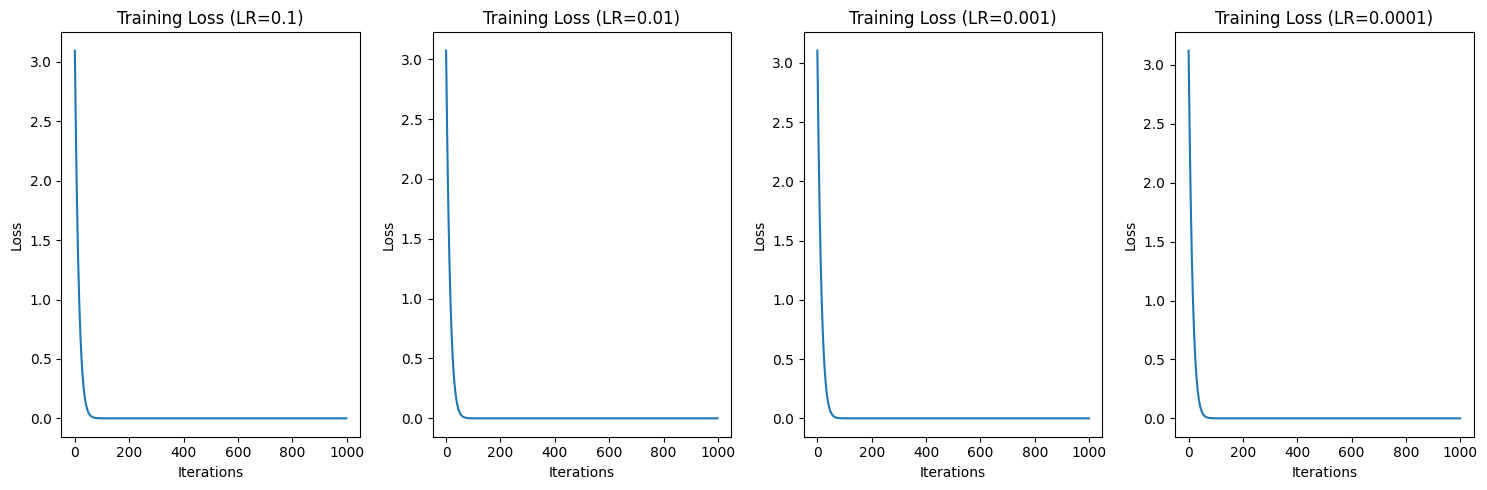

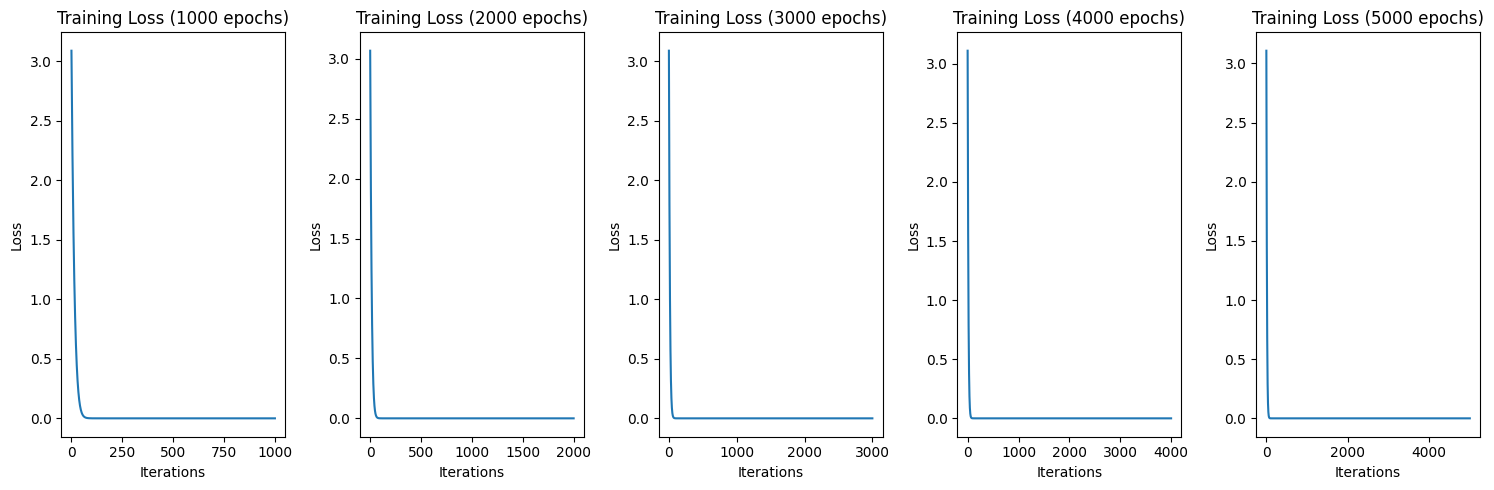

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Завантажте набір даних Digits
digits = datasets.load_digits()
X_digits = digits.data
Y_digits = digits.target.reshape(-1, 1)
scaler_digits = StandardScaler().fit(X_digits)
X_digits = scaler_digits.transform(X_digits)

X_digits_train, X_digits_test, Y_digits_train, Y_digits_test = train_test_split(X_digits, Y_digits, test_size=0.2,
                                                                                random_state=42)


def initialize_weights(n_input, n_hidden, n_output):
    W1 = np.random.randn(n_input, n_hidden) * 0.01
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output) * 0.01
    b2 = np.zeros((1, n_output))

    return W1, b1, W2, b2


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


def initialize_weights(n_input, n_hidden, n_output):
    W1 = np.random.randn(n_input, n_hidden) * 0.01
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output) * 0.01
    b2 = np.zeros((1, n_output))
    return W1, b1, W2, b2


def forward_pass_multiclass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2


def backward_pass_multiclass(X, Y, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate=0.01):
    m = X.shape[0]
    dZ2 = A2 - Y
    dW2 = 1 / m * np.dot(A1.T, dZ2)
    db2 = 1 / m * np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = 1 / m * np.dot(X.T, dZ1)
    db1 = 1 / m * np.sum(dZ1, axis=0, keepdims=True)
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    return W1, b1, W2, b2


def compute_multiclass_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[0]
    L = -(1 / m) * L_sum
    return L


def train_model(X, Y, W1, b1, W2, b2, num_iterations=1000, learning_rate=0.01):
    loss_values = []  # Список для збереження значень втрат на кожній ітерації
    for i in range(num_iterations):
        Z1, A1, Z2, A2 = forward_pass_multiclass(X, W1, b1, W2, b2)
        W1, b1, W2, b2 = backward_pass_multiclass(X, Y, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate=0.01)
        loss = compute_multiclass_loss(Y, A2)
        loss_values.append(loss)
    return W1, b1, W2, b2, loss_values


# Changing the learning rate
learning_rates = [0.1, 0.01, 0.001, 0.0001]
num_lr = len(learning_rates)
fig, axs = plt.subplots(1, num_lr, figsize=(15, 5))

for i, lr in enumerate(learning_rates):
    W1_initial, b1_initial, W2_initial, b2_initial = initialize_weights(X_digits_train.shape[1], n_hidden=5, n_output=1)
    W1, b1, W2, b2, loss_values = train_model(X_digits_train, Y_digits_train, W1_initial, b1_initial, W2_initial, b2_initial, num_iterations=1000, learning_rate=lr)

    axs[i].plot(loss_values)
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(f'Training Loss (LR={lr})')

plt.tight_layout()
plt.show()

# Changing the number of epochs
epochs_list = [1000, 2000, 3000, 4000, 5000]
num_epochs = len(epochs_list)
fig, axs = plt.subplots(1, num_epochs, figsize=(15, 5))

for i, epochs in enumerate(epochs_list):
    W1_initial, b1_initial, W2_initial, b2_initial = initialize_weights(X_digits_train.shape[1], n_hidden=5, n_output=1)
    W1, b1, W2, b2, loss_values = train_model(X_digits_train, Y_digits_train, W1_initial, b1_initial, W2_initial, b2_initial, num_iterations=epochs)

    axs[i].plot(loss_values)
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(f'Training Loss ({epochs} epochs)')

plt.tight_layout()
plt.show()
